Importando as bibliotecas e arquivos

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

In [ ]:
# upload de arquivos
files.upload()

### Considerando a base de dados experimento_test_ab.csv
* Exercícios 01 e 02

Preparando o ambiente

In [3]:
# visualizando o df esperimento teste AB
df_experimento = pd.read_csv('/content/experimento_teste_ab.csv')
df_experimento.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [4]:
# criando dicionario do df experimento e renomeando os indexs
dic_experimento = {
    'Visitante_ID': 'visitante_ID',
    'Versão_Página': 'versao_pagina',
    'Visualizações' : 'visualizacoes',
    'Conversões' : 'conversoes'
}
df_experimento.rename(columns=dic_experimento, inplace=True)
df_experimento.columns

Index(['visitante_ID', 'versao_pagina', 'visualizacoes', 'conversoes'], dtype='object')

In [5]:
df_experimento.nunique()

,0
visitante_ID,2000
versao_pagina,2
visualizacoes,100
conversoes,2


In [6]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visitante_ID   2000 non-null   int64 
 1   versao_pagina  2000 non-null   object
 2   visualizacoes  2000 non-null   int64 
 3   conversoes     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [7]:
df_experimento.describe().round(2)

,visitante_ID,visualizacoes,conversoes
count,2000.00,2000.00,2000.00
mean,1000.50,150.76,0.12
std,577.49,28.81,0.32
min,1.00,100.00,0.00
25%,500.75,126.00,0.00
50%,1000.50,151.00,0.00
75%,1500.25,175.00,0.00
max,2000.00,199.00,1.00


1. Qual dos cenários tem a maior taxa de conversão?

In [8]:
# calculando a taxa de conversao para a versao A
total_visualizacoes_A = df_experimento[df_experimento['versao_pagina'] == 'A']['visualizacoes'].sum()
total_conversoes_A = df_experimento[df_experimento['versao_pagina'] == 'A']['conversoes'].sum()
taxa_conversao_A = (total_conversoes_A / total_visualizacoes_A) * 100

print(f'Taxa de conversão para a Versão A: {taxa_conversao_A:.2f}%')

# calculando a taxa de conversao para a versao B
total_visualizacoes_B = df_experimento[df_experimento['versao_pagina'] == 'B']['visualizacoes'].sum()
total_conversoes_B = df_experimento[df_experimento['versao_pagina'] == 'B']['conversoes'].sum()
taxa_conversao_B = (total_conversoes_B / total_visualizacoes_B) * 100

print(f'Taxa de conversão para a Versão B: {taxa_conversao_B:.2f}%')

Taxa de conversão para a Versão A: 0.07%
Taxa de conversão para a Versão B: 0.08%


Conclusão: O cenário B tem a maior taxa de conversão.

---

2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

* O cenário A, da base, como o inicial, que funciona hoje.
* Considere 95% de confiança de que o efeito na conversão não foi
aleatório com um nível de significância de 5% (alpha = 0,05).
* Também considere 80% de certeza conseguir capturar o efeito da
nova abordagem.
* O aumento para 10% de conversão.


In [9]:
conversoes_A = df_experimento[df_experimento['versao_pagina'] == 'A']['conversoes'].sum()
visualizacoes_A = df_experimento[df_experimento['versao_pagina'] == 'A']['visualizacoes'].sum()
poder = 0.8  # Poder do teste (80%)
nivel_significancia = 0.05  # Nível de significância (5%)
p_B = 0.10  # Conversão esperada (10%)

# Calculando a taxa de conversão de A
p_A = conversoes_A / visualizacoes_A

# Usando valores críticos para a distribuição normal
Z_alpha = stats.norm.ppf(1 - nivel_significancia / 2)  # Para nível de confiança
Z_beta = stats.norm.ppf(poder)  # Para o poder do teste

# Calculando o tamanho da amostra necessária
n = ((Z_alpha * np.sqrt(2 * p_A * (1 - p_A)) + Z_beta * np.sqrt(p_B * (1 - p_B))) / (p_B - p_A)) ** 2
n_ajustado = np.ceil(n)

print(f'Tamanho da amostra necessária para o cenário A: {n_ajustado:.2f}')

Tamanho da amostra necessária para o cenário A: 11.00


---

### Considerando a base de dados pacientes.csv

* Exercícios de 03 a 09

Preparação do ambiente e normalização da base

In [10]:
# visualizando df pacientes
df_pacientes = pd.read_csv('/content/pacientes.csv')
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [11]:
# retirando coluna Unnamed
df_pacientes.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# criando um dicionario dos indexs do df pacientes e renomeando eles.
dic_pacientes = {'Pressao_Arterial' : 'pressao_arterial',
                 'Idade': 'idade',
                 'Genero': 'genero',
                 'Etnia': 'etnia',
                 'Estado_Saude': 'estado_saude',
                 'Nome_Genero': 'nome_genero',
                 'Nome_Etnia': 'nome_etnia',
                 'Nome_Estado_Saude' : 'nome_estado_saude'}
df_pacientes.rename(columns=dic_pacientes, inplace=True)
df_pacientes.columns

Index(['pressao_arterial', 'idade', 'genero', 'etnia', 'estado_saude',
       'nome_genero', 'nome_etnia', 'nome_estado_saude'],
      dtype='object')

In [13]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pressao_arterial   1000 non-null   float64
 1   idade              1000 non-null   int64  
 2   genero             1000 non-null   int64  
 3   etnia              1000 non-null   int64  
 4   estado_saude       1000 non-null   int64  
 5   nome_genero        1000 non-null   object 
 6   nome_etnia         1000 non-null   object 
 7   nome_estado_saude  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [14]:
df_pacientes.describe().round(2)

,pressao_arterial,idade,genero,etnia,estado_saude
count,1000.00,1000.00,1000.0,1000.00,1000.00
mean,150.38,49.76,0.5,1.53,0.51
std,9.94,11.68,0.5,1.10,0.50
min,112.93,30.00,0.0,0.00,0.00
25%,144.24,40.00,0.0,1.00,0.00
50%,150.46,49.00,1.0,2.00,1.00
75%,156.79,60.00,1.0,3.00,1.00
max,181.80,70.00,1.0,3.00,1.00


3. Considerando uma amostra de 45 números que representam o index do dataframe, indices abaixo. Considerando essa amostra é possível dizer que a  idade média das pessoas com problemas cardíacos é maior que 50  anos? Nível de significância igual a 5%.

In [15]:
indices_q3 = ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358,
            36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505,
            273, 957, 362])
df_q3 = df_pacientes.iloc[indices_q3]

#Hipoteses -> H0 x <= 50   H1 x >= 50, nivel_significancia = 0.05

amostra = 45
desvio_amostra = df_q3['idade'].std()
media_amostra = df_q3['idade'].mean()

# calculando teste t de Student

t_calculado = (media_amostra - 50) / (desvio_amostra / np.sqrt(amostra))
graus_liberdade = amostra - 1

print(f'O valor do t calculado é: {t_calculado:.2f}')

# calcular o t critico

t_critico = stats.t.ppf(1 - 0.05, graus_liberdade)
print(f'O valor do t critico é: {t_critico:.2f}')

# a hipotese nula não seria rejeitada pois o valor de t calculado é menor que o valor do t critico.

O valor do t calculado é: 0.05
O valor do t critico é: 1.68


---

4. Queremos entender que tipo de amostra estamos lidando se dividirmos
os conjuntos em 2, sendo um com pessoas que têm condições de saúde
adicionais e o outro com pessoas saudáveis. Seria dependente ou
independente?

In [16]:
grupo_cond_adicionais = df_pacientes[df_pacientes['nome_estado_saude'] == 'Com condições de saúde adicionais']
grupo_saudavel = df_pacientes[df_pacientes['nome_estado_saude'] == 'Saudável']
print(f'Grupo de pessoas com condições de saúde adicionais: {grupo_cond_adicionais.shape[0]}')
print(f'Grupo de pessoas saudáveis: {grupo_saudavel.shape[0]}')

Grupo de pessoas com condições de saúde adicionais: 510
Grupo de pessoas saudáveis: 490


In [17]:
grupo_cond_adicionais_1 = df_pacientes[df_pacientes['estado_saude'] == 1]
grupo_cond_adicionais_0 = df_pacientes[df_pacientes['estado_saude'] == 0]

In [18]:
# H0 - Os dois grupos são independentes
# H1 - Os dois grupos são dependentes
# Para este tipo de testes podemos utilizar o teste do Qui-quadrado - pois podemos dividir os grupos em categorias

# tabelas de contingencia
tabela_contingencia_estado_saude_genero = pd.crosstab(df_pacientes['nome_estado_saude'], df_pacientes['nome_genero'])
tabela_contingencia_estado_saude_etnia = pd.crosstab(df_pacientes['nome_estado_saude'], df_pacientes['nome_etnia'])

# calculo do valor do qui-quadrado
qui_quadrado_estado_saude_genero, p_valor_estado_saude_genero, _, _ = stats.chi2_contingency(tabela_contingencia_estado_saude_genero)
qui_quadrado_estado_saude_etnia, p_valor_estado_saude_etnia, _, _ = stats.chi2_contingency(tabela_contingencia_estado_saude_etnia)

print(f'Qui-quadrado para estado de saúde e gênero: {qui_quadrado_estado_saude_genero:.2f}')
print(f'Qui-quadrado para estado de saúde e etnia: {qui_quadrado_estado_saude_etnia:.2f}')

print(f'P-valor para estado de saúde e gênero: {p_valor_estado_saude_genero:.2f}')
print(f'P-valor para estado de saúde e etnia: {p_valor_estado_saude_etnia:.2f}')


Qui-quadrado para estado de saúde e gênero: 0.00
Qui-quadrado para estado de saúde e etnia: 0.86
P-valor para estado de saúde e gênero: 1.00
P-valor para estado de saúde e etnia: 0.83


---

5. Agora considere o um conjunto de pessoas aleatória que representam o
index do dataframe, indice_q5, podemos dizer que a pressão arterial média para pacientes
com condições de saúde adicionais é igual à pressão arterial média para
pacientes sem condições adicionais de saúde? Considere o nível de
significância a 6%.


In [19]:
indices_q5 = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174,
            105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372])

# H0 pressao_art_med(pacientes com condicao de saude adicoonais) = pressao_art_med(pacientes sem condicao de saude adicionais)
# H1 pressao_art_med(pacientes com condicao de saude adicoonais) =! pressao_art_med(pacientes sem condicao de saude adicionais)
# nivel_significancia = 0.06

# filtrando o df
df_q5 = df_pacientes.iloc[indices_q5]

# calculando tamanho da amostra
amostra = df_q5.shape[0]

# calculando media e desvio padrao
media_amostra = df_q5['pressao_arterial'].mean()
desvio_amostra = df_q5['pressao_arterial'].std()

# calculando o teste t de student
t_calculado = (media_amostra - amostra) / (desvio_amostra / np.sqrt(amostra))
graus_liberdade = amostra - 1
print(f'O valor do t calculado é: {t_calculado:.2f}')

# calcular o t critico
t_critico = stats.t.ppf(1 - 0.06, graus_liberdade)

print(f'O valor do t critico é: {t_critico:.2f}')

# a hipotese nula seria rejeitada pois o valor de t calculado é maior que o valor do t critico.

O valor do t calculado é: 83.90
O valor do t critico é: 1.61


---

6. Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
* Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.

* Hipótese Alternativa (H1): Há uma diferença significativa na pressão
arterial média entre pelo menos dois grupos étnicos nesta
população.


In [20]:
# gerando o df de analise
df_etnia = df_pacientes[['nome_etnia', 'pressao_arterial']]
df_pressao = df_pacientes[['pressao_arterial']]

# agrupando por etnia
groupos = df_etnia.groupby('nome_etnia').groups

# extraindo pressao de cada grupo

afro = df_pressao.iloc[groupos['Afro-americano']]
asiatico = df_pressao.iloc[groupos['Asiático']]
hispanico = df_pressao.iloc[groupos['Hispânico']]
afro_caucasiano = df_pressao.iloc[groupos['Caucasiano']]

# Perform the ANOVA
f_value, p_value = stats.f_oneway(afro, asiatico, hispanico, afro_caucasiano)

print(f'F-value: {f_value}')
print(f'P-value: {p_value}')


F-value: [0.23245296]
P-value: [0.87380012]


Como a hipótese nula do teste é que a pressão arterial média é a mesma em todos os grupos étnicos e o p-valor é maior que 0.05 não podemos rejeitar o H0. Então não há diferença estatísticamente da média entre os grupos.

---

* Hi Existe uma associação entre a idade dos pacientes e sua
pressão arterial?:
> i.Hipótese Nula (H0): A idade dos pacientes é independente
da pressão arterial.<br/>
ii. Hipótese Alternativa (H1): A idade dos pacientes está
associada à sua pressão arterial.

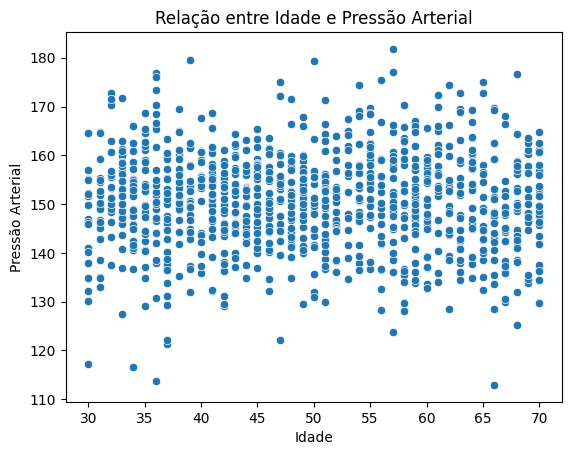

In [21]:
idade_pressao = df_pacientes[['idade', 'pressao_arterial']]

sns.scatterplot(x='idade', y='pressao_arterial', data=df_pacientes)
plt.title('Relação entre Idade e Pressão Arterial')
plt.xlabel('Idade')
plt.ylabel('Pressão Arterial')
plt.show()

In [22]:
# Correlação de Pearson
corr_pearson, p_value_pearson = pearsonr(idade_pressao['idade'], idade_pressao['pressao_arterial'])
print(f'Correlação de Pearson: {corr_pearson}, Valor p: {p_value_pearson}')

# Se os dados não forem normalmente distribuídos, você pode usar o coeficiente de Spearman:
corr_spearman, p_value_spearman = spearmanr(idade_pressao['idade'], idade_pressao['pressao_arterial'])
print(f'Correlação de Spearman: {corr_spearman}, Valor p: {p_value_spearman}')

Correlação de Pearson: -0.021385356934648977, Valor p: 0.4993608212055476
Correlação de Spearman: -0.036182496829582286, Valor p: 0.25298284904743235


Realizando dois testes de correlação ambos retornam o valor do p-valor maior que 0.05, portanto não podemos rejeitar a hipotese nula H0, podendo a idade dos pacientes ser independente da pressão arteial estatísticamente.

---

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de
gênero neste grupo de pacientes. Acredita-se que há uma relação entre
o sexo e condições de saúde adicionais. (Teste qui-quadrado)


In [23]:
# tabelas de contingencia
tabela_contingencia_estado_saude_genero = pd.crosstab(df_pacientes['nome_estado_saude'], df_pacientes['nome_genero'])

# calculo do valor do qui-quadrado
qui_quadrado_estado_saude_genero, p_valor_estado_saude_genero, _, _ = stats.chi2_contingency(tabela_contingencia_estado_saude_genero)

print(f'Qui-quadrado para estado de saúde e gênero: {qui_quadrado_estado_saude_genero:.2f}')

print(f'P-valor para estado de saúde e gênero: {p_valor_estado_saude_genero:.2f}')


Qui-quadrado para estado de saúde e gênero: 0.00
P-valor para estado de saúde e gênero: 1.00


Conclusão: De acordo com o analisado no teste, o p-valor considerando a comparação entre saúde e genero, podemos rejeitar a hipotese nula de que há uma relação entre genero e condições de saúde. Portanto estatísticamente não há uma relação entre as duas variáveis.

---



8. Qual é o intervalo de confiança para a média da pressão arterial entre os
pacientes com condições de saúde adicionais? (nível de confiança 95%)


In [24]:
df_q8 = df_pacientes.loc[df_pacientes['estado_saude'] == 1]

# calculando media, desvio padrão e tamanho da amostra

media_amostra = df_q8['pressao_arterial'].mean()
desvio_amostra = df_q8['pressao_arterial'].std()
amostra = df_q8.shape[0]

erro_padrao = desvio_amostra / np.sqrt(amostra)
confianca = 0.95
intervalo_confianca = stats.norm.interval(confianca, loc=media_amostra, scale=erro_padrao)

print(f'O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais é: {intervalo_confianca}')

O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais é: (149.22186145551754, 151.01504243479755)


---

9. A distribuição da pressão arterial na população segue uma distribuição
normal?
* Hipótese Nula (H0): A distribuição da pressão arterial na população
segue uma distribuição normal.
* Hipótese Alternativa (H1): A distribuição da pressão arterial na
população não segue uma distribuição normal.

In [25]:
# dataframe para usar na questão 9
df_q9 = df_pacientes['pressao_arterial']

# Teste KS
ks_statistic, p_value = stats.kstest(df_q9, 'norm')

print(f'Statistic: {ks_statistic}')
print(f'P-value: {p_value}')


Statistic: 1.0
P-value: 0.0


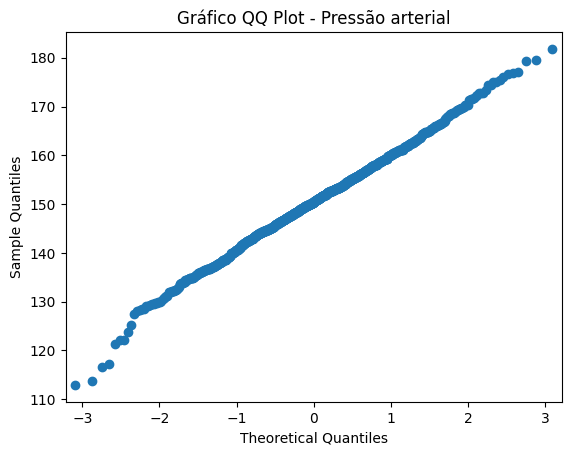

In [26]:
import statsmodels.api as sm
sm.qqplot(df_q9)
plt.title('Gráfico QQ Plot - Pressão arterial')
plt.show()

Conclusão: Ao analisar pelo teste KS, seu p-valor dando menor que 0.05 podemos rejeitar a hipótese nula de que a distribuição da pressão arterial na população segue uma distribuição normal.

Porém ao apresentarmos o Gráfico QQ Plot, a distribuição se parece com uma distribuição normal.

---